In [2]:
import cv2
import os
import glob
import random

# Set the folder path
folder_path = "/home/addisu-alemu/Desktop/week_12/Automated-Storyboard-Synthesis-for-Digital-Advertising/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854"

# Get the list of images in the folder
image_files = glob.glob(os.path.join(folder_path, "*.png"))

# Load the images
images = []
for file in image_files:
    img = cv2.imread(file)
    images.append(img)

# Define the agents
agents = []
for i in range(3):
    agent = {
        "name": f"Agent {i}",
        "preferences": {
            "color": ["red", "green", "blue"],
            "shape": ["circle", "square", "triangle"]
        },
"decision_function": lambda img: random.choice([img for img in images if img.shape[1] > 100 and any(c in cv2.split(img)[0].flatten() for c in agent["preferences"]["color"])] if len([img for img in images if img.shape[1] > 100 and any(c in cv2.split(img)[0].flatten() for c in agent["preferences"]["color"])])) or random.choice(images),    }
    agents.append(agent)

# Simulate the agents
frame = None
for agent in agents:
    img = agent["decision_function"](images)
    if frame is None:
        frame = img
    else:
        frame = cv2.hconcat([frame, img])

# Save the composed frame
cv2.imwrite("frame_composed.png", frame)

SyntaxError: invalid syntax (3513817468.py, line 27)

In [1]:

from PIL import Image

def compose_vertical_image(header_image_path, logo_image_path, thumbnail_image_path, output_image_path):
    # Load images
    header_image = Image.open(header_image_path).convert("RGBA")
    logo_image = Image.open(logo_image_path).convert("RGBA")
    thumbnail_image = Image.open(thumbnail_image_path).convert("RGBA")
    
    # Resize images while maintaining aspect ratio
    max_width = max(header_image.width, logo_image.width, thumbnail_image.width)
    max_height = header_image.height + logo_image.height + thumbnail_image.height
    
    header_image = resize_image(header_image, max_width, header_image.height)
    logo_image = resize_image(logo_image, max_width, logo_image.height)
    thumbnail_image = resize_image(thumbnail_image, max_width, thumbnail_image.height)
    
    # Calculate centering for header within logo
    header_center_x = (logo_image.width - header_image.width) // 4
    header_center_y = (logo_image.height - header_image.height) // 1
    
    # Paste header image into logo image
    logo_image.paste(header_image, (header_center_x, header_center_y), mask=header_image)
    
    # Create a new image with the calculated dimensions
    composed_image = Image.new('RGBA', (max_width, max_height), color=(255, 255, 255, 0))
    
    # Paste logo image onto the composed image
    composed_image.paste(logo_image, (0, 0), mask=logo_image)
    
    # Paste thumbnail image below logo image
    logo_y_offset = logo_image.height
    composed_image.paste(thumbnail_image, (0, logo_y_offset), mask=thumbnail_image)
    
    # Save composed image
    composed_image.save(output_image_path)
    print(f"Composed image saved at {output_image_path}")
    
    display(composed_image)

def resize_image(image, target_width, target_height):
    """
    Resize an image while maintaining aspect ratio.
    """
    width_ratio = target_width / image.width
    height_ratio = target_height / image.height
    resize_ratio = min(width_ratio, height_ratio)
    
    new_width = int(image.width * resize_ratio)
    new_height = int(image.height * resize_ratio)
    
    return image.resize((new_width, new_height), Image.LANCZOS)

Composed image saved at /home/addisu-alemu/Desktop/week_12/Automated-Storyboard-Synthesis-for-Digital-Advertising/composed_image.png


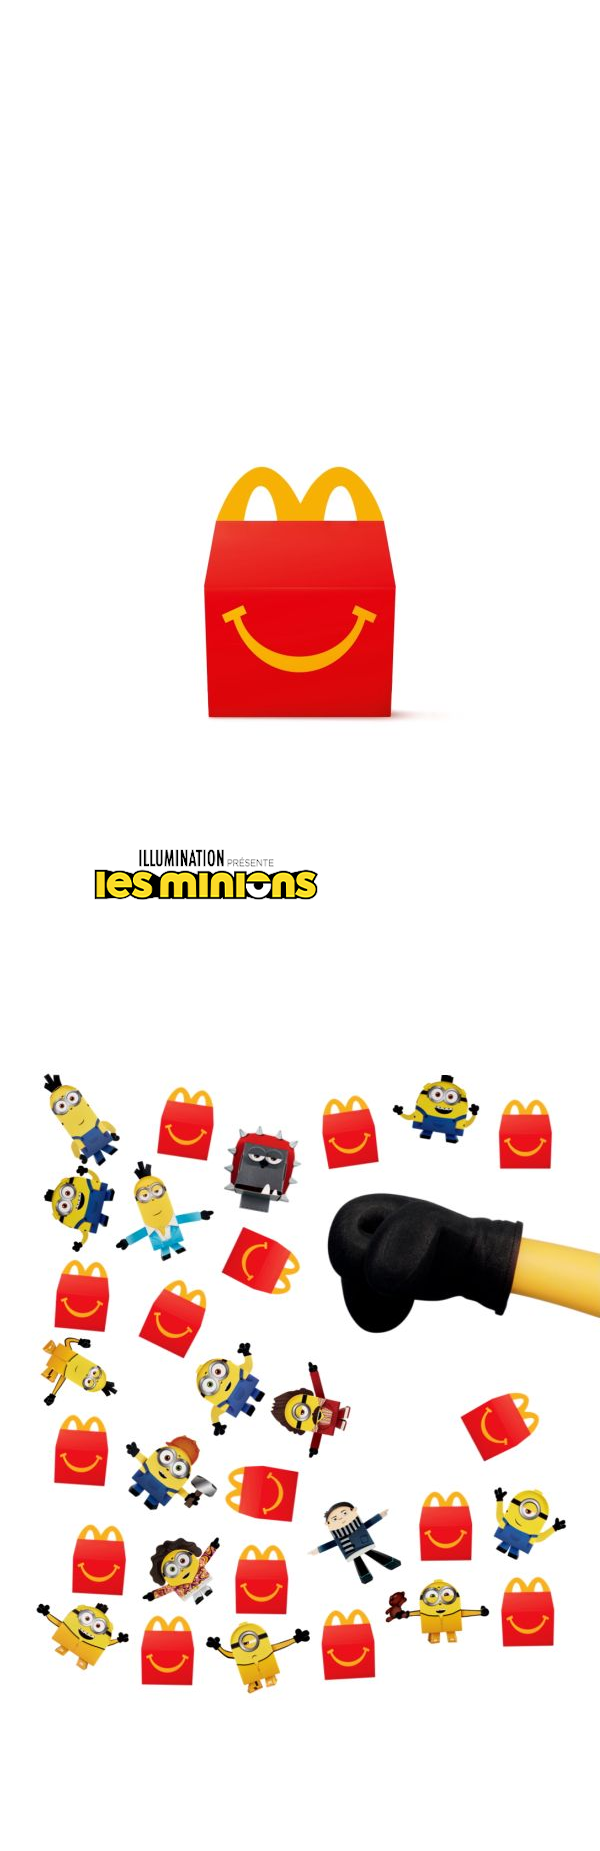

In [5]:

compose_vertical_image("/home/addisu-alemu/Desktop/week_12/Automated-Storyboard-Synthesis-for-Digital-Advertising/Challenge_Data/Assets/2a6bbf47edb9f1cb3a722784c5e73e83/logo.png",
                       "/home/addisu-alemu/Desktop/week_12/Automated-Storyboard-Synthesis-for-Digital-Advertising/Challenge_Data/Assets/2a6bbf47edb9f1cb3a722784c5e73e83/landing.jpg",
                       "/home/addisu-alemu/Desktop/week_12/Automated-Storyboard-Synthesis-for-Digital-Advertising/Challenge_Data/Assets/2a6bbf47edb9f1cb3a722784c5e73e83/endframe.jpg",
                       "/home/addisu-alemu/Desktop/week_12/Automated-Storyboard-Synthesis-for-Digital-Advertising/composed_image.png")


In [8]:
# image, target_width, target_height


resize_image("/home/addisu-alemu/Desktop/week_12/Automated-Storyboard-Synthesis-for-Digital-Advertising/composed_image.png", 20 , 30)

AttributeError: 'str' object has no attribute 'width'